In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport        #pandas-profiling is outdated so change to ydata 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import Workbook
import librosa



C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# أسماء الملفات الصوتية مع أسماء المتحدثين
audio_files = [("m7mad 1.wav", "mohammad"),
               ("Farah.wav", "farah"),
               ("hussin.wav", "hussin"),
               ("hussin2.wav", "hussin")]

# قائمة لتجميع جميع البيانات
all_data = []

for file, speaker in audio_files:
    y, sr = librosa.load(file, sr=16000)
    stft = np.abs(librosa.stft(y))
    feature_vector = stft.mean(axis=1)


    for feature in feature_vector:
        all_data.append([speaker, feature])

# Convert list to DataFrame
df = pd.DataFrame(all_data, columns=["speaker", "feature"])

# Save data to CSV
df.to_csv("data_with_speaker.csv", index=False)

print("CSV file created with speakers and features.")

C:\Users\damar\AppData\Local\Temp\ipykernel_26268\774704922.py:11: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file, sr=16000)
C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'm7mad 1.wav'

test the xlsx to see how good bad the data is

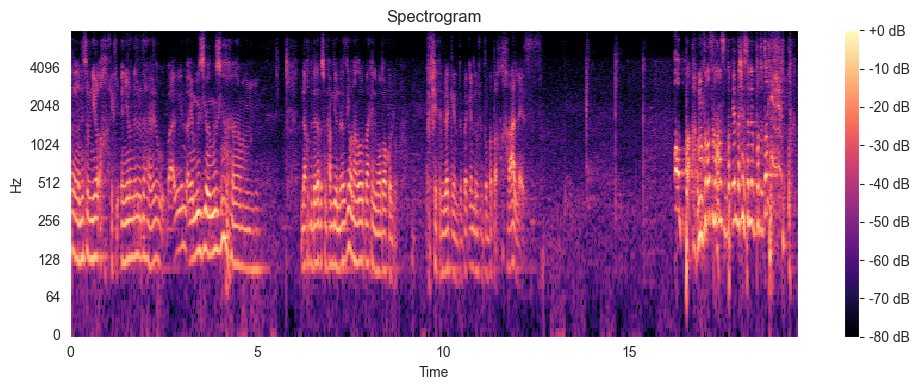

In [5]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

In [12]:
stft_df.columns = ['feature_' + str(i+1) for i in range(stft_df.shape[1])]
stft_df.to_csv("voice_data.csv", index=False)

In [16]:
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split  # up
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import accuracy_score  # up

# Load features from the CSV file
data = pd.read_csv("voice_data.csv")

data


,feature_1
0,0.187214
1,0.171087
2,0.148606
3,0.146730
4,0.144038
...,...
1020,0.007355
1021,0.007507
1022,0.007545
1023,0.007188


In [38]:
data = pd.read_csv("voice_data.csv")  # Ensure the file exists in your working directory

# Separate features (X) and labels (y)
X = data.drop(columns=['feature_1'])
y = data['feature_1']

# Check the data (Optional for debugging purposes)

print("Features (X) preview:\n ")
X.head()

X.isnull().sum()


Features (X) preview:
 


feature_2    1025
dtype: int64

In [39]:
print("(y) preview:\n")
y.head()

(y) preview:



0    0.187214
1    0.171087
2    0.148606
3    0.146730
4    0.144038
Name: feature_1, dtype: float64

In [40]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

# Indicate the script is complete
print("\nDone")

C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the dataset
data = pd.read_csv("voice_data.csv")

# Separate features (X) and target (y)
X = data.drop(columns=['feature_1'])  # Replace 'feature_1' with the actual target column name
y = data['feature_1']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Indicate the script is complete
print("\nDone")


Mean Squared Error (MSE): 0.42
R^2 Score: -0.00

Done


C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
